## CSC420 - Assignment 3

## Humzah Khan

#### Question 4 - Corner Detection (40)

4.1 Calculate Eigenvalues of M

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_eigenvalues(image, window_size=3, sigma=1, ksize=3):
    """
    Computes eigenvalues of the second moment matrix (structure tensor) for each pixel in the image.

    Parameters:
        image (numpy array): Input grayscale image.
        window_size (int): Size of the local window for computing the second moment matrix.

    Returns:
        lambda1 (numpy array): First eigenvalue matrix.
        lambda2 (numpy array): Second eigenvalue matrix.
    """
    # Convert to grayscale if image is RGB
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Compute gradients using Sobel operators
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize)

    # Compute gradient products
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Apply a Gaussian filter for smoothing
    Ixx = cv2.GaussianBlur(Ixx, (window_size, window_size), sigma)
    Iyy = cv2.GaussianBlur(Iyy, (window_size, window_size), sigma)
    Ixy = cv2.GaussianBlur(Ixy, (window_size, window_size), sigma)

    # Compute eigenvalues for each pixel
    trace = Ixx + Iyy
    determinant = (Ixx * Iyy) - (Ixy * Ixy)
    lambda1 = (trace + np.sqrt(trace**2 - 4 * determinant)) / 2
    lambda2 = (trace - np.sqrt(trace**2 - 4 * determinant)) / 2

    return lambda1, lambda2



4.2 Scatter Plots of Eigenvalues

In [2]:
def plot_scatter_eigenvalues(lambda1, lambda2, title):
    """
    Plots a scatter plot of eigenvalues (λ1, λ2) for an image.

    Parameters:
        lambda1 (numpy array): First eigenvalue matrix.
        lambda2 (numpy array): Second eigenvalue matrix.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(lambda1.ravel(), lambda2.ravel(), s=1, alpha=0.5, color='blue')
    plt.xlabel("λ1 (Largest Eigenvalue)")
    plt.ylabel("λ2 (Smallest Eigenvalue)")
    plt.title(title)
    plt.grid(True)
    plt.show()

Saving I1.jpg to I1.jpg
Saving I2.jpg to I2.jpg


<ipython-input-1-e11e84fcdc69>:40: RuntimeWarning: invalid value encountered in sqrt
  lambda1 = (trace + np.sqrt(trace**2 - 4 * determinant)) / 2
<ipython-input-1-e11e84fcdc69>:41: RuntimeWarning: invalid value encountered in sqrt
  lambda2 = (trace - np.sqrt(trace**2 - 4 * determinant)) / 2


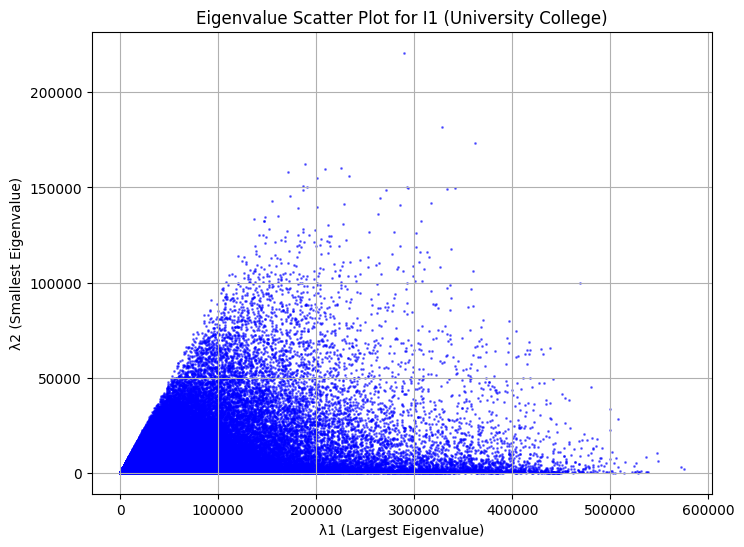

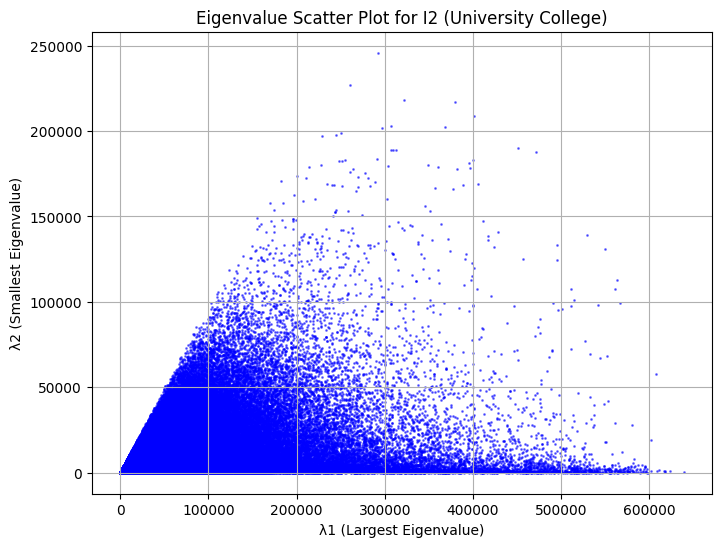

In [3]:
# Load the two images (Manual Upload)
from google.colab import files
uploaded = files.upload()  # Upload two images manually
image_filenames = list(uploaded.keys())

# Read the images
I1 = cv2.imread(image_filenames[0])
I2 = cv2.imread(image_filenames[1])

# Compute eigenvalues for both images
lambda1_I1, lambda2_I1 = compute_eigenvalues(I1)
lambda1_I2, lambda2_I2 = compute_eigenvalues(I2)

# Scatter plots of eigenvalues for I1 and I2
plot_scatter_eigenvalues(lambda1_I1, lambda2_I1, "Eigenvalue Scatter Plot for I1 (University College)")
plot_scatter_eigenvalues(lambda1_I2, lambda2_I2, "Eigenvalue Scatter Plot for I2 (University College)")

4.3 Select Threshold

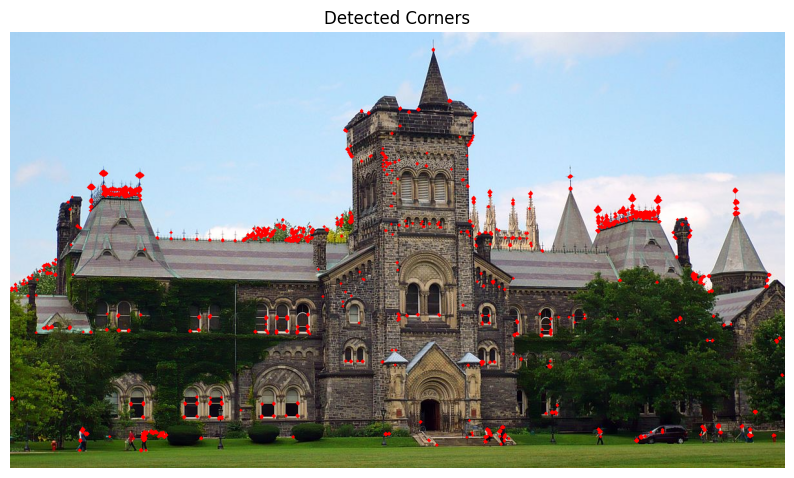

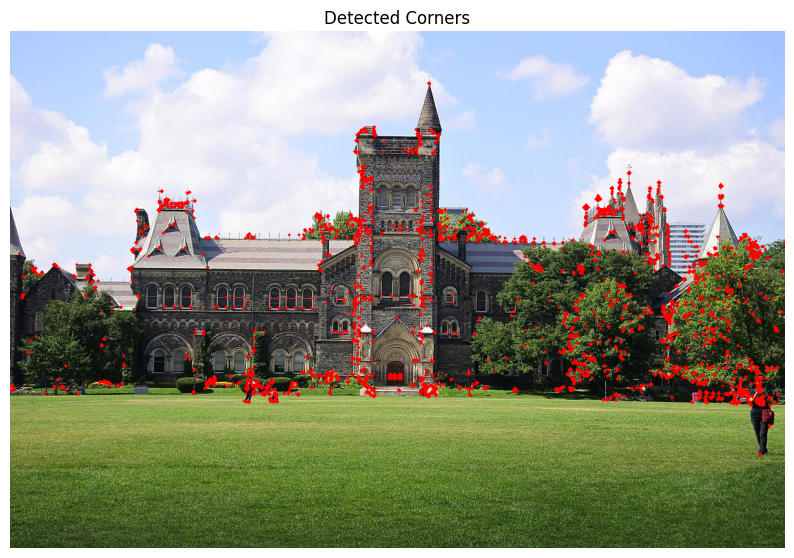

In [6]:
def detect_and_plot_corners(image, lambda1, lambda2, threshold=10000):
    """
    Detects corners using the minimum eigenvalue threshold and plots them on the original image.

    Parameters:
        image (numpy array): Input image (color).
        lambda1 (numpy array): First eigenvalue matrix.
        lambda2 (numpy array): Second eigenvalue matrix.
        threshold (float): Minimum eigenvalue threshold for detecting corners.
    """
    # Compute minimum eigenvalue at each pixel
    min_lambda = np.minimum(lambda1, lambda2)

    # Identify corner locations
    corners = np.argwhere(min_lambda > threshold)  # Get indices where min eigenvalue exceeds threshold

    # Copy the image to overlay corners
    corner_image = image.copy()

    # Draw detected corners as red dots
    for y, x in corners:
        cv2.circle(corner_image, (x, y), radius=2, color=(0, 0, 255), thickness=-1)  # Red dots

    # Show the image with detected corners
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title("Detected Corners")
    plt.axis("off")
    plt.show()

# Run corner detection on both images
detect_and_plot_corners(I1, lambda1_I1, lambda2_I1, threshold=50000)
detect_and_plot_corners(I2, lambda1_I2, lambda2_I2, threshold=50000)


4.4 Trying with Bigger Gaussian Kernel

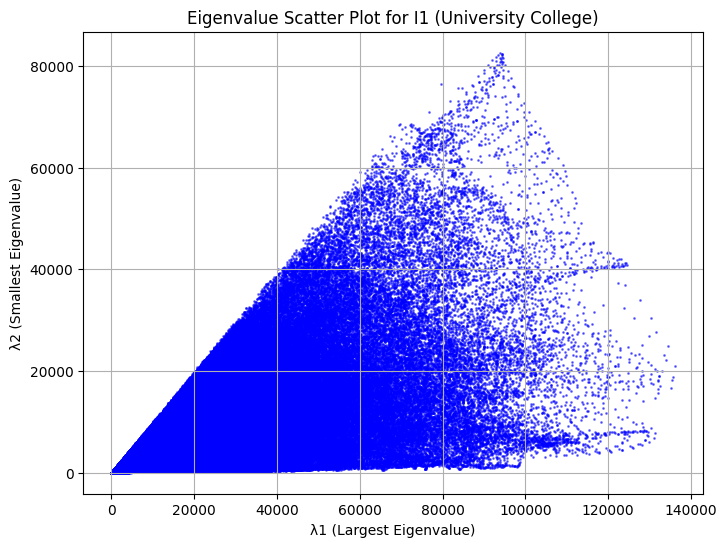

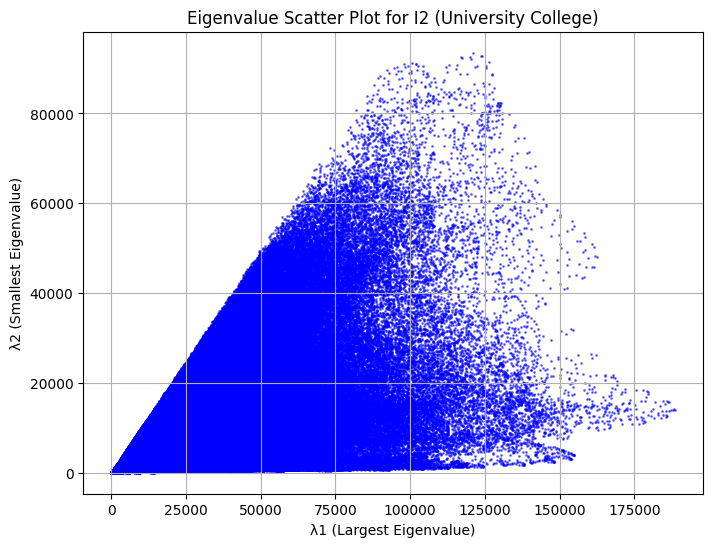

In [16]:
# Compute eigenvalues for both images
lambda1_I1, lambda2_I1 = compute_eigenvalues(I1, window_size=31, sigma=5)
lambda1_I2, lambda2_I2 = compute_eigenvalues(I2, window_size=31, sigma=5)

# Scatter plots of eigenvalues for I1 and I2
plot_scatter_eigenvalues(lambda1_I1, lambda2_I1, "Eigenvalue Scatter Plot for I1 (University College)")
plot_scatter_eigenvalues(lambda1_I2, lambda2_I2, "Eigenvalue Scatter Plot for I2 (University College)")

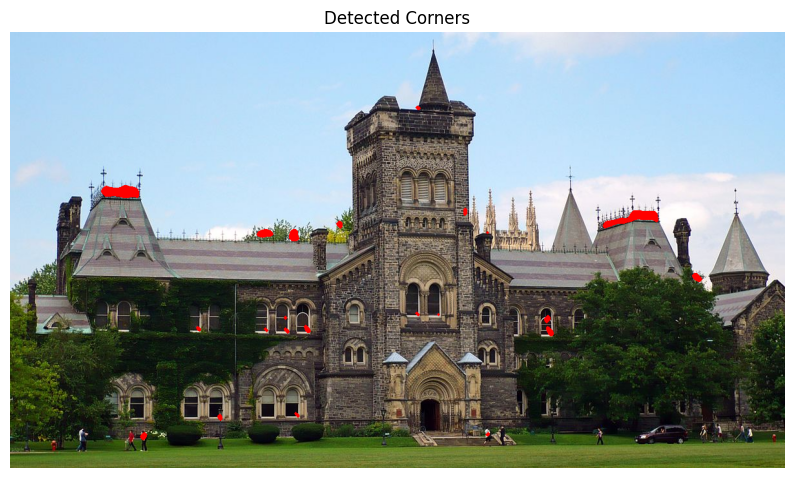

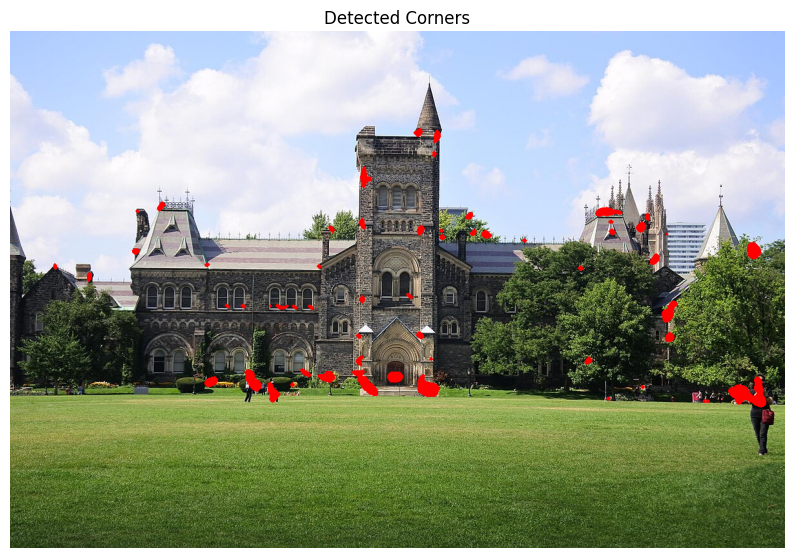

In [17]:
# Run corner detection on both images
detect_and_plot_corners(I1, lambda1_I1, lambda2_I1, threshold=50000)
detect_and_plot_corners(I2, lambda1_I2, lambda2_I2, threshold=50000)

## Analysis: How Increasing 𝜎 Affects Corner Detection

1. Corners become more stable and robust.

  *   With a larger Gaussian kernel, small-scale variations (like noise, textures) are smoothed out.
  *   The method now detects only prominent corners, ignoring finer details.

2. Loss of small details.
  * In I1 and I2 with a small 𝜎, many small texture-based features were picked up.
  * With large 𝜎, the detection focuses on **bigger structures** (e.g., window corners, large edges).
  * Small textures in **brick walls, windows, trees, and fine structures in the University College are filtered out.**

3. Stronger bias towards high-contrast regions.
  * Larger 𝜎 prefers smooth yet **strong edges**, meaning areas with sharp gradients and large contrast differences get detected more frequently, particularly in building edges which have clear sharp contrasts.
  * Subtle texture-based corners that were visible in **fine structures may be lost.**